# Model performance figures

In [2]:
import numpy as np
import pandas as pd
from itertools import islice
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
%matplotlib inline
plt.rcParams.update({'font.size': 14})

## Read in data

### DyGIE++
#### On PICKLE
First, read in the csv that contains the performances for all models (besides SeeDev) on PICKLE with no types:

In [3]:
dygiepp_no_labels_perf = pd.read_csv('/mnt/ufs18/home-118/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/15Jul2023_all_on_pickle_no_seedev_performance.csv')
dygiepp_no_labels_perf['model'] = dygiepp_no_labels_perf['pred_file'].str.split('_').str[-2]
dygiepp_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle
1,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.193694,0.072919,0.105819,0.000000,0.000000,0.000000,"(0.1429979253112033, 0.2502936241610738)","(0.05333745205549978, 0.09474637681159417)","(0.07839296166227686, 0.13527554548482587)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",ace05-relation
2,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478968,0.674144,0.559745,0.057466,0.086344,0.068621,"(0.43032869912059807, 0.5308687868236084)","(0.6406513153003568, 0.7108491030638333)","(0.5190181925003347, 0.6002697495183045)","(0.03457632090684005, 0.08541554231822657)","(0.057188308886971524, 0.12067924528301884)","(0.044473370023383384, 0.09702656546489562)",scierc
3,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.557187,0.196518,0.289868,NaN,NaN,NaN,"(0.4912152530292231, 0.6242472804972805)","(0.1523317471518495, 0.24312158926383784)","(0.23576190476190473, 0.3419524854981555)",NaN,NaN,NaN,genia
4,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.589271,0.377282,0.459691,0.118089,0.023735,0.039048,"(0.5134214210792485, 0.6597671470822966)","(0.31619556173564173, 0.4429260106656407)","(0.3932587830568571, 0.5283259376302464)","(0.04967592592592593, 0.20930232558139536)","(0.007501830573391912, 0.04328817733990146)","(0.013247961852022767, 0.06758396923631556)",chemprot
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478597,0.656190,0.553169,0.072374,0.089572,0.079652,"(0.4294379741252424, 0.5316811214758135)","(0.6164612612449871, 0.691908914545175)","(0.5141514693449252, 0.5977567158569393)","(0.03612494415231811, 0.11568160175684078)","(0.04887108610567514, 0.13172888094778185)","(0.042886436544521116, 0.1180061037639878)",scierc-lightweight
6,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.570708,0.160570,0.249894,NaN,NaN,NaN,"(0.49902699456975774, 0.643936419763142)","(0.11667512308468143, 0.20724809293513485)","(0.19321837835989722, 0.3061844812816278)",NaN,NaN,NaN,genia-lightweight


Now read in the SeeDev performance with no labels:

In [4]:
seedev_no_labels_perf = pd.read_csv('../data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/17Jul2023_seedev_on_pickle_performance_no_labels.csv')
seedev_no_labels_perf['model'] = seedev_no_labels_perf['pred_file'].str.split('_').str[-2]
seedev_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,17Jul2023_seedev_on_pickle_PICKLE_250_abstract...,PICKLE_250_abstracts_entities_and_relations_FI...,0.373344,0.314438,0.340887,0.167352,0.066984,0.094928,"(0.31789976918733104, 0.4304071630210769)","(0.26929228179228176, 0.35934436835687483)","(0.29586052643654476, 0.3803187764879307)","(0.04750056420672534, 0.349972186904005)","(0.017564797672573393, 0.14164540816326524)","(0.0264594334393325, 0.19697090527267153)",seedev


Now combine them:

In [5]:
dygiepp_no_labels_perf = pd.concat([dygiepp_no_labels_perf, seedev_no_labels_perf])
dygiepp_no_labels_perf = dygiepp_no_labels_perf.sort_values('ent_F1').reset_index(drop=True)
dygiepp_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.193694,0.072919,0.105819,0.000000,0.000000,0.000000,"(0.1429979253112033, 0.2502936241610738)","(0.05333745205549978, 0.09474637681159417)","(0.07839296166227686, 0.13527554548482587)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",ace05-relation
1,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.570708,0.160570,0.249894,NaN,NaN,NaN,"(0.49902699456975774, 0.643936419763142)","(0.11667512308468143, 0.20724809293513485)","(0.19321837835989722, 0.3061844812816278)",NaN,NaN,NaN,genia-lightweight
2,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.557187,0.196518,0.289868,NaN,NaN,NaN,"(0.4912152530292231, 0.6242472804972805)","(0.1523317471518495, 0.24312158926383784)","(0.23576190476190473, 0.3419524854981555)",NaN,NaN,NaN,genia
3,17Jul2023_seedev_on_pickle_PICKLE_250_abstract...,PICKLE_250_abstracts_entities_and_relations_FI...,0.373344,0.314438,0.340887,0.167352,0.066984,0.094928,"(0.31789976918733104, 0.4304071630210769)","(0.26929228179228176, 0.35934436835687483)","(0.29586052643654476, 0.3803187764879307)","(0.04750056420672534, 0.349972186904005)","(0.017564797672573393, 0.14164540816326524)","(0.0264594334393325, 0.19697090527267153)",seedev
4,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.589271,0.377282,0.459691,0.118089,0.023735,0.039048,"(0.5134214210792485, 0.6597671470822966)","(0.31619556173564173, 0.4429260106656407)","(0.3932587830568571, 0.5283259376302464)","(0.04967592592592593, 0.20930232558139536)","(0.007501830573391912, 0.04328817733990146)","(0.013247961852022767, 0.06758396923631556)",chemprot
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478597,0.656190,0.553169,0.072374,0.089572,0.079652,"(0.4294379741252424, 0.5316811214758135)","(0.6164612612449871, 0.691908914545175)","(0.5141514693449252, 0.5977567158569393)","(0.03612494415231811, 0.11568160175684078)","(0.04887108610567514, 0.13172888094778185)","(0.042886436544521116, 0.1180061037639878)",scierc-lightweight
6,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478968,0.674144,0.559745,0.057466,0.086344,0.068621,"(0.43032869912059807, 0.5308687868236084)","(0.6406513153003568, 0.7108491030638333)","(0.5190181925003347, 0.6002697495183045)","(0.03457632090684005, 0.08541554231822657)","(0.057188308886971524, 0.12067924528301884)","(0.044473370023383384, 0.09702656546489562)",scierc
7,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle


Now, read in the performance for the models that we could evaluate with types; for PICKLE this is a true labeled evaluation, for ChemProt, SeeDev and GENIA, this is the mapped types evaluation. All of these are in separate CSV files; we want to comboine them for ease of use.

In [6]:
prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/'
typed_eval_dygiepp_paths = {
    'chemprot': '15Jul2023_chemprot_on_pickle_TYPES_MAPPED_performance.csv',
    'genia': '15Jul2023_GENIA_on_pickle_TYPES_MAPPED_performance.csv',
    'seedev': '17Jul2023_seedev_on_pickle_performance_MAPPED_labels.csv',
    'pickle': '15Jul2023_PICKLE_on_pickle_TYPES_MAPPED_performance.csv'
}
typed_eval_dygiepp_dfs = []
for dset, apath in typed_eval_dygiepp_paths.items():
    df = pd.read_csv(f'{prefix_path}{apath}')
    df['model'] = df['pred_file'].str.split('_').str[-2]
    typed_eval_dygiepp_dfs.append(df)
typed_eval_dygiepp_all_df = pd.concat(typed_eval_dygiepp_dfs).sort_values('ent_F1').reset_index(drop=True)
typed_eval_dygiepp_all_df

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.166639,0.107436,0.130551,0.111271,0.021825,0.036006,"(0.10151235864914425, 0.23857180981506587)","(0.06004895647607037, 0.15896755655503933)","(0.07560255446587316, 0.1898002006506371)","(0.03771367521367522, 0.22448979591836735)","(0.006053467783410478, 0.04050865192403797)","(0.010176335369911077, 0.06353850034684996)",chemprot
1,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.352933,0.098635,0.153730,NaN,NaN,NaN,"(0.26963684371651614, 0.4360096153846154)","(0.06928701506849932, 0.13092115766551077)","(0.11307571228219436, 0.1983850317260391)",NaN,NaN,NaN,genia-lightweight
2,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.315242,0.111508,0.164282,NaN,NaN,NaN,"(0.24241811883266848, 0.38657853086001615)","(0.07554023320719212, 0.15069775358491572)","(0.1159320147789192, 0.21068759444275786)",NaN,NaN,NaN,genia
3,17Jul2023_seedev_on_pickle_PICKLE_250_abstract...,PICKLE_250_abstracts_entities_and_relations_FI...,0.192010,0.159925,0.174249,0.048003,0.019253,0.027238,"(0.15567399706783952, 0.23310967565210586)","(0.1298654243114866, 0.19146995531223718)","(0.14381794661062433, 0.20647461660556266)","(0.007543336944745397, 0.10816558441558437)","(0.003148602719033233, 0.03985012554927808)","(0.004632102378943097, 0.05703252032520325)",seedev
4,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.786266,0.792469,0.789318,0.486484,0.278747,0.353623,"(0.7473052218389438, 0.8231816865902558)","(0.7588560429469521, 0.8209822471542008)","(0.755175417517722, 0.8201116040765001)","(0.4104739010989011, 0.5480600048537798)","(0.2235184099077288, 0.32700939874896756)","(0.2997287522603978, 0.39846161761679355)",pickle


#### On original domain test set
Since PICKLE was already included in the on PICKLE evals above, we won't re-import it here.

In [7]:
all_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/17Jul2023_original_domain_application/performance/'
pick_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/'
original_dom_typed_eval_dygiepp_paths = {
    'chemprot': 'chemprot_on_original_test_with_types.csv',
    'scierc': 'scierc_on_original_test_with_types.csv',
    'genia': 'genia_on_original_test_with_types.csv',
    'seedev': 'seedev_on_original_test_with_types.csv',
    'pickle': '15Jul2023_PICKLE_on_pickle_TYPES_MAPPED_performance.csv'
}
original_dom_typed_eval_dygiepp_dfs = []
for dset, apath in original_dom_typed_eval_dygiepp_paths.items():
    if dset != 'pickle':
        df = pd.read_csv(f'{all_prefix_path}{apath}')
    else:
        df = pd.read_csv(f'{pick_prefix_path}{apath}')
    df['model'] = df['pred_file'].str.split('_').str[-2]
    original_dom_typed_eval_dygiepp_dfs.append(df)
original_dom_typed_eval_dygiepp_all_df = pd.concat(original_dom_typed_eval_dygiepp_dfs).sort_values('ent_F1').reset_index(drop=True)
original_dom_typed_eval_dygiepp_all_df

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,17Jul2023_original_domain_seedev_15Jul2023_See...,15Jul2023_SeeDev_splits_from_train_dev_combine...,0.692900,0.635931,0.662974,0.303739,0.112787,0.163470,"(0.6663757197632532, 0.7188552415027959)","(0.5818926099851706, 0.6843352119892404)","(0.6204486722509356, 0.6936483611346058)","(0.23008536944362673, 0.388657357679914)","(0.07677894023587521, 0.1537619124349707)","(0.1187950406686984, 0.2100606580479137)",seedev
1,17Jul2023_original_domain_scierc_test_scierc-l...,test.json,0.656067,0.682640,0.669058,0.541761,0.414319,0.469362,"(0.6274365509584461, 0.6842844430754488)","(0.6526412801564667, 0.7116745894554883)","(0.6411644791514244, 0.6961459204823818)","(0.49061263110782466, 0.5905144789935912)","(0.3717942500115834, 0.4616557605226529)","(0.4285064277760907, 0.5137367851078481)",scierc-lightweight
2,17Jul2023_original_domain_scierc_test_scierc_p...,test.json,0.672740,0.691877,0.682142,0.555033,0.407451,0.469707,"(0.641666628419759, 0.7014408115162187)","(0.6593282121994167, 0.7219858156028369)","(0.6515108655371347, 0.7109833012665522)","(0.507274653993128, 0.6074004326593702)","(0.35917616334283, 0.45322609957910626)","(0.4233395261119466, 0.5124758750017109)",scierc
3,17Jul2023_original_domain_genia_test_genia-lig...,test.json,0.807781,0.720488,0.761615,NaN,NaN,NaN,"(0.7911665997410253, 0.8260072940405128)","(0.7000317353416939, 0.7421248277353953)","(0.7449555575725381, 0.7796279137165357)",NaN,NaN,NaN,genia-lightweight
4,17Jul2023_original_domain_genia_test_genia_pre...,test.json,0.784904,0.745789,0.764821,NaN,NaN,NaN,"(0.7698401807931807, 0.8024519792983974)","(0.7248492367327184, 0.7647229791410313)","(0.7495853199176374, 0.7812172860057477)",NaN,NaN,NaN,genia
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.786266,0.792469,0.789318,0.486484,0.278747,0.353623,"(0.7473052218389438, 0.8231816865902558)","(0.7588560429469521, 0.8209822471542008)","(0.755175417517722, 0.8201116040765001)","(0.4104739010989011, 0.5480600048537798)","(0.2235184099077288, 0.32700939874896756)","(0.2997287522603978, 0.39846161761679355)",pickle
6,17Jul2023_original_domain_chemprot_test_chempr...,test.jsonl,0.899349,0.910882,0.905072,0.542289,0.575168,0.558158,"(0.8909223873502103, 0.908145452955884)","(0.9017623126390173, 0.9198407775646356)","(0.8974148558842204, 0.9117091165602897)","(0.5070242779262563, 0.575644353024995)","(0.5451401067600291, 0.606205437469547)","(0.5256613379132664, 0.588154478984388)",chemprot


In [8]:
all_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/17Jul2023_original_domain_application/performance/'
pick_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/'
original_dom_no_label_eval_dygiepp_paths = {
    'chemprot': 'chemprot_on_original_test_withOUT_types.csv',
    'scierc': 'scierc_on_original_test_withOUT_types.csv',
    'genia': 'genia_on_original_test_withOUT_types.csv',
    'seedev': 'seedev_on_original_test_withOUT_types.csv',
    
}
original_dom_no_label_eval_dygiepp_dfs = []
for dset, apath in original_dom_no_label_eval_dygiepp_paths.items():
    df = pd.read_csv(f'{all_prefix_path}{apath}')
    df['model'] = df['pred_file'].str.split('_').str[-2]
    original_dom_no_label_eval_dygiepp_dfs.append(df)
original_dom_no_label_eval_dygiepp_all_df = pd.concat(original_dom_no_label_eval_dygiepp_dfs)
# Have to pull the pickle row manually from the original no label dataframe
original_dom_no_label_eval_dygiepp_all_df.loc[len(original_dom_no_label_eval_dygiepp_all_df.index)] = dygiepp_no_labels_perf.loc[7]
original_dom_no_label_eval_dygiepp_all_df = original_dom_no_label_eval_dygiepp_all_df.sort_values('ent_F1').reset_index(drop=True)
original_dom_no_label_eval_dygiepp_all_df

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,17Jul2023_original_domain_seedev_15Jul2023_See...,15Jul2023_SeeDev_splits_from_train_dev_combine...,0.791875,0.728412,0.758568,0.371577,0.138108,0.200042,"(0.7644860618553104, 0.8208294070737332)","(0.685704035587974, 0.7681351320625419)","(0.7351324975568795, 0.7826133970945961)","(0.29663500149147565, 0.4664527027027027)","(0.09699857752489331, 0.17686035829122645)","(0.1539415545290219, 0.24014093251381385)",seedev
1,17Jul2023_original_domain_genia_test_genia_pre...,test.json,0.816894,0.776876,0.796359,NaN,NaN,NaN,"(0.8017382971495418, 0.82974976450769)","(0.7592544454870774, 0.7943605828622655)","(0.783196395118502, 0.809749544147556)",NaN,NaN,NaN,genia
2,17Jul2023_original_domain_genia_test_genia-lig...,test.json,0.844523,0.753637,0.796471,NaN,NaN,NaN,"(0.831424502012108, 0.856893104970334)","(0.7356813240990305, 0.7708045814479638)","(0.7837319711383308, 0.8094964630308533)",NaN,NaN,NaN,genia-lightweight
3,17Jul2023_original_domain_scierc_test_scierc-l...,test.json,0.781260,0.812743,0.796647,0.606449,0.463241,0.525066,"(0.7589333646244335, 0.8028857426038025)","(0.7904235737838204, 0.833539116624223)","(0.7788776951834463, 0.8155792383129136)","(0.5622696579399094, 0.6541203540343449)","(0.4238633236622499, 0.5110243085503996)","(0.48677907559372796, 0.5679263397947548)",scierc-lightweight
4,17Jul2023_original_domain_scierc_test_scierc_p...,test.json,0.795328,0.816233,0.805605,0.616922,0.453258,0.522340,"(0.7702827067507294, 0.8193516010010246)","(0.7915212887938948, 0.8404938811188811)","(0.7823415022850979, 0.8269088558466693)","(0.5752725220211785, 0.6599220611223744)","(0.4114321420752494, 0.49412720055313)","(0.48266170434772954, 0.5616247727252955)",scierc
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle
6,17Jul2023_original_domain_chemprot_test_chempr...,test.jsonl,0.905670,0.923925,0.914702,0.681020,0.713932,0.696993,"(0.897241031854914, 0.91340231993418)","(0.9163631127592354, 0.9310179752606993)","(0.9081795485397203, 0.9210918315725405)","(0.6526965547118408, 0.7087009803921569)","(0.6856450450450451, 0.7390486446523926)","(0.6720491682490957, 0.7185113808086702)",chemprot


Combine into a dict for easier processing:

In [9]:
all_perfs = {
    'on_pickle_withOUT_types': dygiepp_no_labels_perf,
    'on_pickle_with_types': typed_eval_dygiepp_all_df,
    'on_original_withOUT_types': original_dom_no_label_eval_dygiepp_all_df,
    'on_original_with_types': original_dom_typed_eval_dygiepp_all_df
}

## Plot

For the moment, I'm going to make a more traditional dot plot to visualize performance.

First, replace `NaN` with `"(0,0)"` and massage the CIs to get them in the right format:

In [10]:
def replace_nan(df):
    """
    Replace a NaN in a CI column with (0,0) to avoid downstream errors.
    """
    idxs = df.index[df['model'].isin(['genia', 'genia-lightweight'])]
    for col_name in ['rel_precision_CI', 'rel_recall_CI', 'rel_F1_CI']:
        for idx in idxs:
            df.loc[idx, col_name] = "(0,0)"
    return df

In [11]:
for name, df in all_perfs.items():
    all_perfs[name] = replace_nan(df)

Then, pre-process the confidence intervals:

In [12]:
def process_CIs(df, kind='F1'):
    """
    literal_evals the CI strings in a given df, and returns two sets of CIs,
    one for entities and one for relations.
    """
    ent_CIs = df[f"ent_{kind}_CI"].apply(lambda x: literal_eval(str(x)))
    ent_CIs = pd.DataFrame([[df[f'ent_{kind}'][i] - val[0] for i, val in enumerate(ent_CIs)], [val[1] - df[f'ent_{kind}'][i] for i, val in enumerate(ent_CIs)]])

    rel_CIs = df[f"rel_{kind}_CI"].apply(lambda x: literal_eval(str(x)))
    rel_CIs = pd.DataFrame([[df[f'rel_{kind}'][i] - val[0] for i, val in enumerate(rel_CIs)], [val[1] - df[f'rel_{kind}'][i] for i, val in enumerate(rel_CIs)]])

    return ent_CIs, rel_CIs

In [13]:
no_lab_pick_ent_CIs, no_lab_pick_rel_CIs = process_CIs(dygiepp_no_labels_perf)
lab_pick_ent_CIs, lab_pick_rel_CIs = process_CIs(typed_eval_dygiepp_all_df)
no_lab_orig_ent_CIs, no_lab_orig_rel_CIs = process_CIs(original_dom_no_label_eval_dygiepp_all_df)
lab_orig_ent_CIs, lab_orig_rel_CIs = process_CIs(original_dom_typed_eval_dygiepp_all_df)

Now, we want to add an x value column so that we have a numerical X-value to be able to offshift:

In [14]:
x_dict = {mod:i for i,mod in enumerate(dygiepp_no_labels_perf["model"].values.tolist())}
x_dict

{'ace05-relation': 0,
 'genia-lightweight': 1,
 'genia': 2,
 'seedev': 3,
 'chemprot': 4,
 'scierc-lightweight': 5,
 'scierc': 6,
 'pickle': 7}

In [15]:
for name, df in all_perfs.items():
    df["x"] = df["model"].map(x_dict)

In [16]:
# Define semantic names for all variables
label_key = {'chemprot': 'ChemProt',
         'scierc': 'SciERC',
         'bioinfer': 'BioInfer',
         'genia': 'GENIA',
         'pickle': 'PICKLE',
         'scierc-lightweight': 'SciERC lightweight',
         'genia-lightweight': 'GENIA lightweight',
         'ace05-relation': 'ACE05',
         'seedev': 'SeeDev'}

### Supplemental figure plots

#### F1

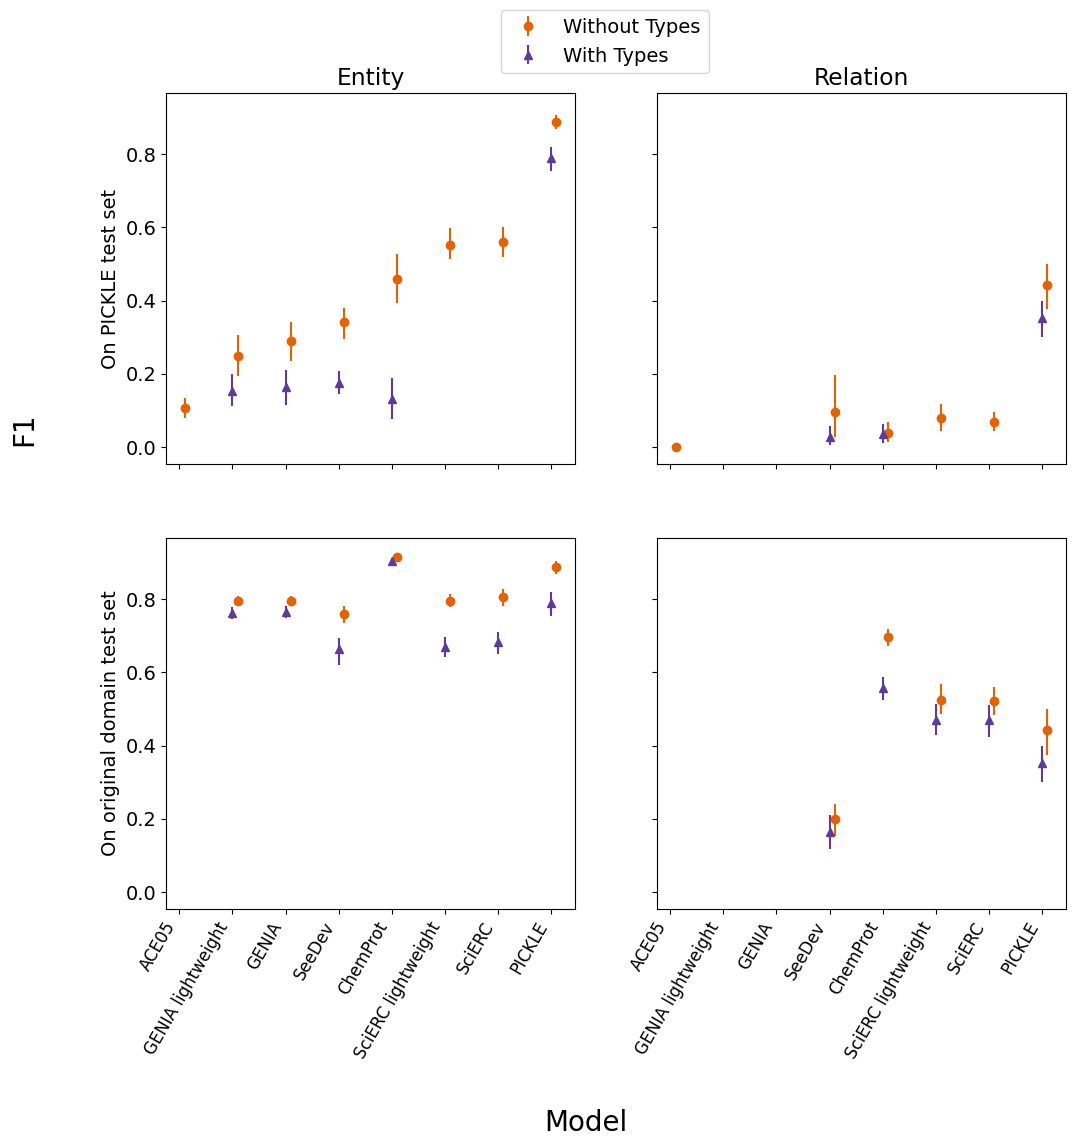

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0,0].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["ent_F1"], yerr=no_lab_pick_ent_CIs, fmt="o", color='#E66100')
axs[0,0].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["ent_F1"], yerr=lab_pick_ent_CIs, fmt="^", color='#5D3A9B')

axs[0,1].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["rel_F1"], yerr=no_lab_pick_rel_CIs, fmt="o", color='#E66100', label='Without Types')
axs[0,1].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["rel_F1"], yerr=lab_pick_rel_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_F1"], yerr=no_lab_orig_ent_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_F1"], yerr=lab_orig_ent_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_F1"], yerr=no_lab_orig_rel_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_F1"], yerr=lab_orig_rel_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1,1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[0,0].set_title('Entity')
axs[0,1].set_title('Relation')
axs[0,0].set_ylabel('On PICKLE test set')
axs[1,0].set_ylabel('On original domain test set')
axs[0,1].legend(bbox_to_anchor=(0.15,1.25))
fig.supxlabel('Model', size=20)
fig.supylabel('F1', y=0.6,  size=20)
fig.subplots_adjust(bottom=0.2, left=0.15)

plt.savefig('../data/straying_off_topic_data/model_performance/F1_all_model_dot_plot.png', format='png', dpi=600)

#### Precision

In [23]:
no_lab_pick_ent_prec_CIs, no_lab_pick_rel_prec_CIs = process_CIs(dygiepp_no_labels_perf, kind='precision')
lab_pick_ent_prec_CIs, lab_pick_rel_prec_CIs = process_CIs(typed_eval_dygiepp_all_df, kind='precision')
no_lab_orig_ent_prec_CIs, no_lab_orig_rel_prec_CIs = process_CIs(original_dom_no_label_eval_dygiepp_all_df, kind='precision')
lab_orig_ent_prec_CIs, lab_orig_rel_prec_CIs = process_CIs(original_dom_typed_eval_dygiepp_all_df, kind='precision')

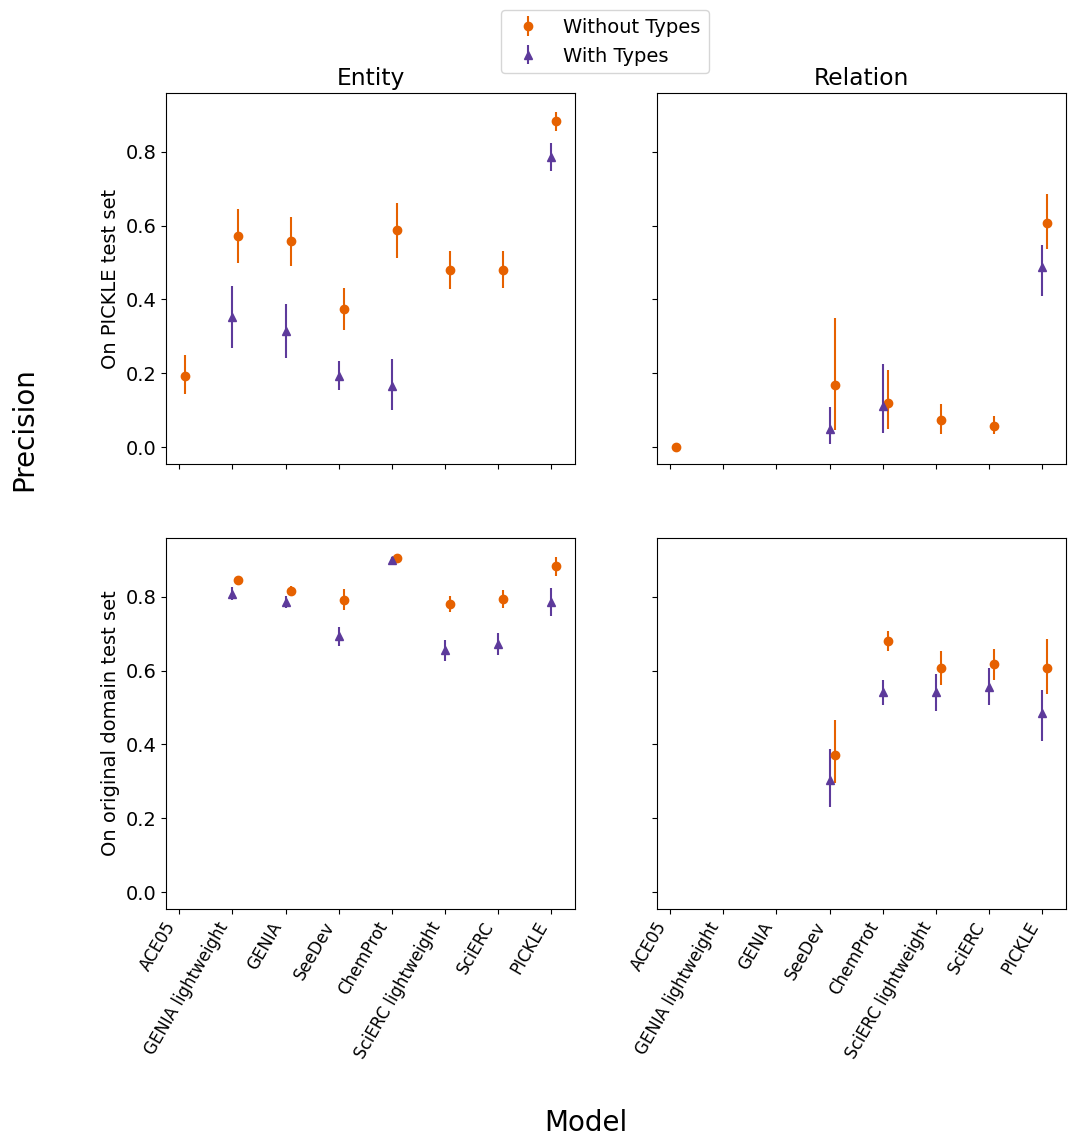

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0,0].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["ent_precision"], yerr=no_lab_pick_ent_prec_CIs, fmt="o", color='#E66100')
axs[0,0].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["ent_precision"], yerr=lab_pick_ent_prec_CIs, fmt="^", color='#5D3A9B')

axs[0,1].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["rel_precision"], yerr=no_lab_pick_rel_prec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[0,1].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["rel_precision"], yerr=lab_pick_rel_prec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_precision"], yerr=no_lab_orig_ent_prec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_precision"], yerr=lab_orig_ent_prec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_precision"], yerr=no_lab_orig_rel_prec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_precision"], yerr=lab_orig_rel_prec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1,1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[0,0].set_title('Entity')
axs[0,1].set_title('Relation')
axs[0,0].set_ylabel('On PICKLE test set')
axs[1,0].set_ylabel('On original domain test set')
axs[0,1].legend(bbox_to_anchor=(0.15,1.25))
fig.supxlabel('Model', size=20)
fig.supylabel('Precision', y=0.6,  size=20)
fig.subplots_adjust(bottom=0.2, left=0.15)

plt.savefig('../data/straying_off_topic_data/model_performance/precision_all_model_dot_plot.png', format='png', dpi=600)

#### Recall

In [25]:
no_lab_pick_ent_rec_CIs, no_lab_pick_rel_rec_CIs = process_CIs(dygiepp_no_labels_perf, kind='recall')
lab_pick_ent_rec_CIs, lab_pick_rel_rec_CIs = process_CIs(typed_eval_dygiepp_all_df, kind='recall')
no_lab_orig_ent_rec_CIs, no_lab_orig_rel_rec_CIs = process_CIs(original_dom_no_label_eval_dygiepp_all_df, kind='recall')
lab_orig_ent_rec_CIs, lab_orig_rel_rec_CIs = process_CIs(original_dom_typed_eval_dygiepp_all_df, kind='recall')

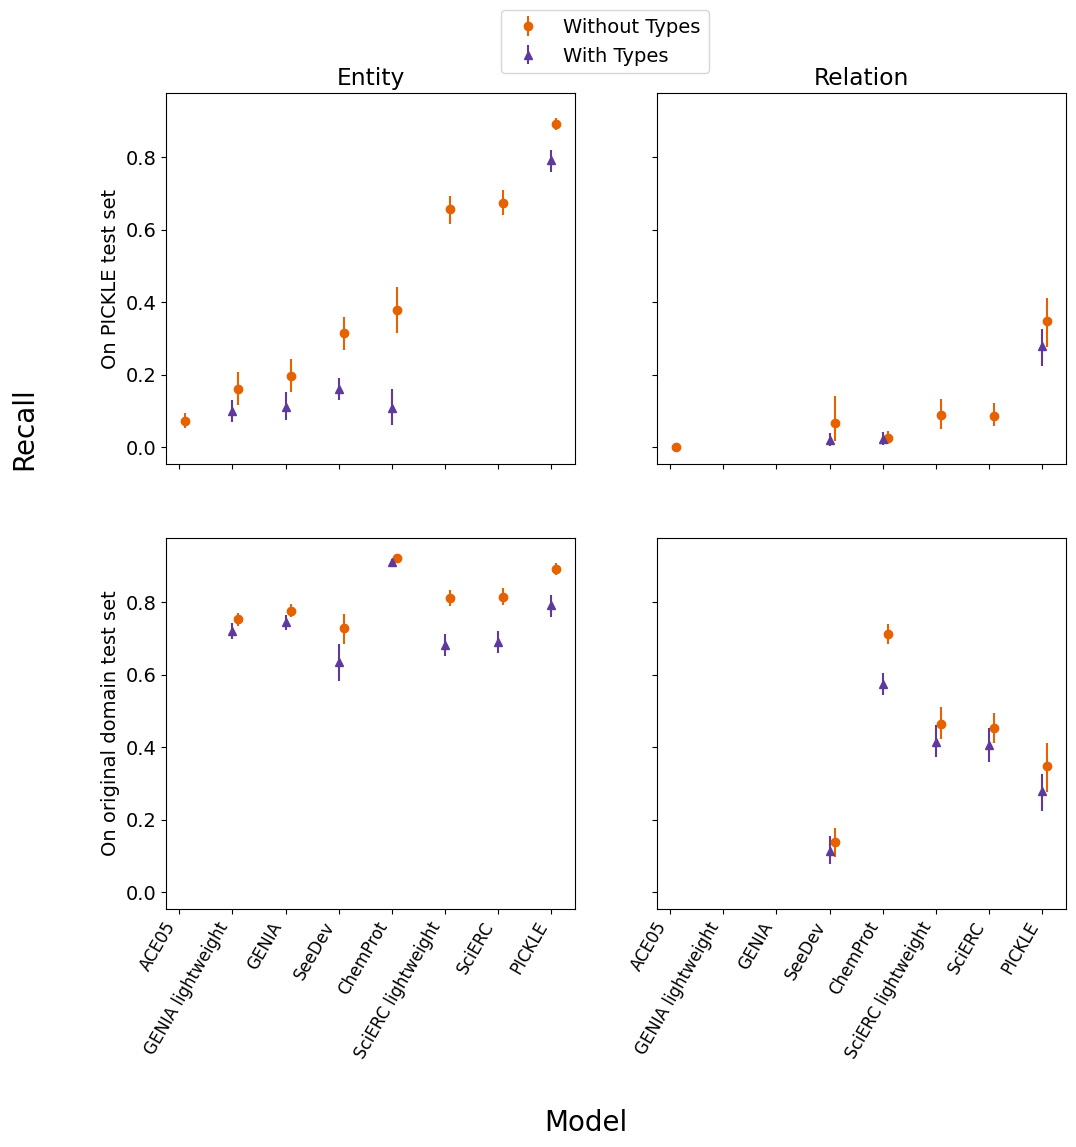

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0,0].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["ent_recall"], yerr=no_lab_pick_ent_rec_CIs, fmt="o", color='#E66100')
axs[0,0].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["ent_recall"], yerr=lab_pick_ent_rec_CIs, fmt="^", color='#5D3A9B')

axs[0,1].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["rel_recall"], yerr=no_lab_pick_rel_rec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[0,1].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["rel_recall"], yerr=lab_pick_rel_rec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_recall"], yerr=no_lab_orig_ent_rec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_recall"], yerr=lab_orig_ent_rec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_recall"], yerr=no_lab_orig_rel_rec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_recall"], yerr=lab_orig_rel_rec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1,1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[0,0].set_title('Entity')
axs[0,1].set_title('Relation')
axs[0,0].set_ylabel('On PICKLE test set')
axs[1,0].set_ylabel('On original domain test set')
axs[0,1].legend(bbox_to_anchor=(0.15,1.25))
fig.supxlabel('Model', size=20)
fig.supylabel('Recall', y=0.6,  size=20)
fig.subplots_adjust(bottom=0.2, left=0.15)

plt.savefig('../data/straying_off_topic_data/model_performance/recall_all_model_dot_plot.png', format='png', dpi=600)

### Bubble plots for main figure
We want to make bubble plots where the x-axis is entity performance, the y-axis is relation performance, and the size of the bubble is the standard deviation in each direction. 
<br><br>
Since we have different standard deviations on each axis (one for entity performance and one for relation performance), we want to use an ellipse instead of a circle as the shape for each point. This means that we can't use the standard matplotlib way of building these plots, which just uses the `s` keyword to change the size of the bubble. We'll instead have to plot an ellipse for each point. The horizontal axis of the ellipse will be bounded by the confidence interval endpoints for entity performance, and the vertical axis will be the confidence interval endpoints for relation performance.

### F1

To set up the data for this plot, we need to get the 4 values required to plot an ellipse (cetner's x and y values, width and height), as well as the label for the point for each point, and its group (original or pickle).

In [24]:
def get_interval_distance(i):
    """
    Get the width or height from a CI.
    
    parameters:
        i: CI value from df
        
    returns:
        dist, float: a number if the interval exists, np.nan otherwise
    """
    try:
        len(i) == 2
        dist = literal_eval(i)[1] - literal_eval(i)[0]
    except TypeError:
        dist = np.nan
        
    return dist

In [25]:
def get_ellipse_values(perf_df, model_idx, metric):
    """
    Get the x, y, width and height for an ellipse.
    
    parameters:
        perf_df, df: dataframe containing performance values
        model_idx, str: name of the row to be used
        metric, str: "F1", "precision", or "recall", determines which metric for which
            to obtain an ellipse
    
    returns:
        ellipse_tup, tuple of floats: (x, y, width, height) if there is performance for 
            both entities and relations, (x, NaN, width, NaN) if there is no relation performance,
            "EXCLUDE" if there is no performance for either.
    """
    # Get the names of the columns we care about
    y_col_name = f'ent_{metric}'
    x_col_name = f'rel_{metric}'
    y_CI_col_name = f'ent_{metric}_CI'
    x_CI_col_name = f'rel_{metric}_CI'
    
    # Get the x and y values for the center of the ellipse
    y = perf_df.loc[model_idx, y_col_name]
    x = perf_df.loc[model_idx, x_col_name]
    
    # Get the width and height
    width = get_interval_distance(perf_df.loc[model_idx, x_CI_col_name])
    height = get_interval_distance(perf_df.loc[model_idx, y_CI_col_name])
    
    ellipse_tup = (x, y, width, height)
        
    return ellipse_tup
    

In [26]:
# Get the ellipse values for all models
graph_part = {}
for name, df in all_perfs.items():
    this_df_ells = {}
    for i in df.index:
        ell = get_ellipse_values(df, i, 'F1')
        model = df.loc[i, "model"]
        this_df_ells[model] = ell
    graph_part[name] = this_df_ells

In [27]:
full_entry_colors = {'scierc': '#CC79A7',
                     'scierc-lightweight': '#D55E00',
                     'ace05-relation': '#0072B2',
                     'genia': '#F0E442',
                     'genia-lightweight': '#009E73',
                    'chemprot': '#56B4E9',
                    'seedev': '#E69F00',
                    'pickle': '#000000'}

In [28]:
graph_part.keys()

dict_keys(['on_pickle_withOUT_types', 'on_pickle_with_types', 'on_original_withOUT_types', 'on_original_with_types'])

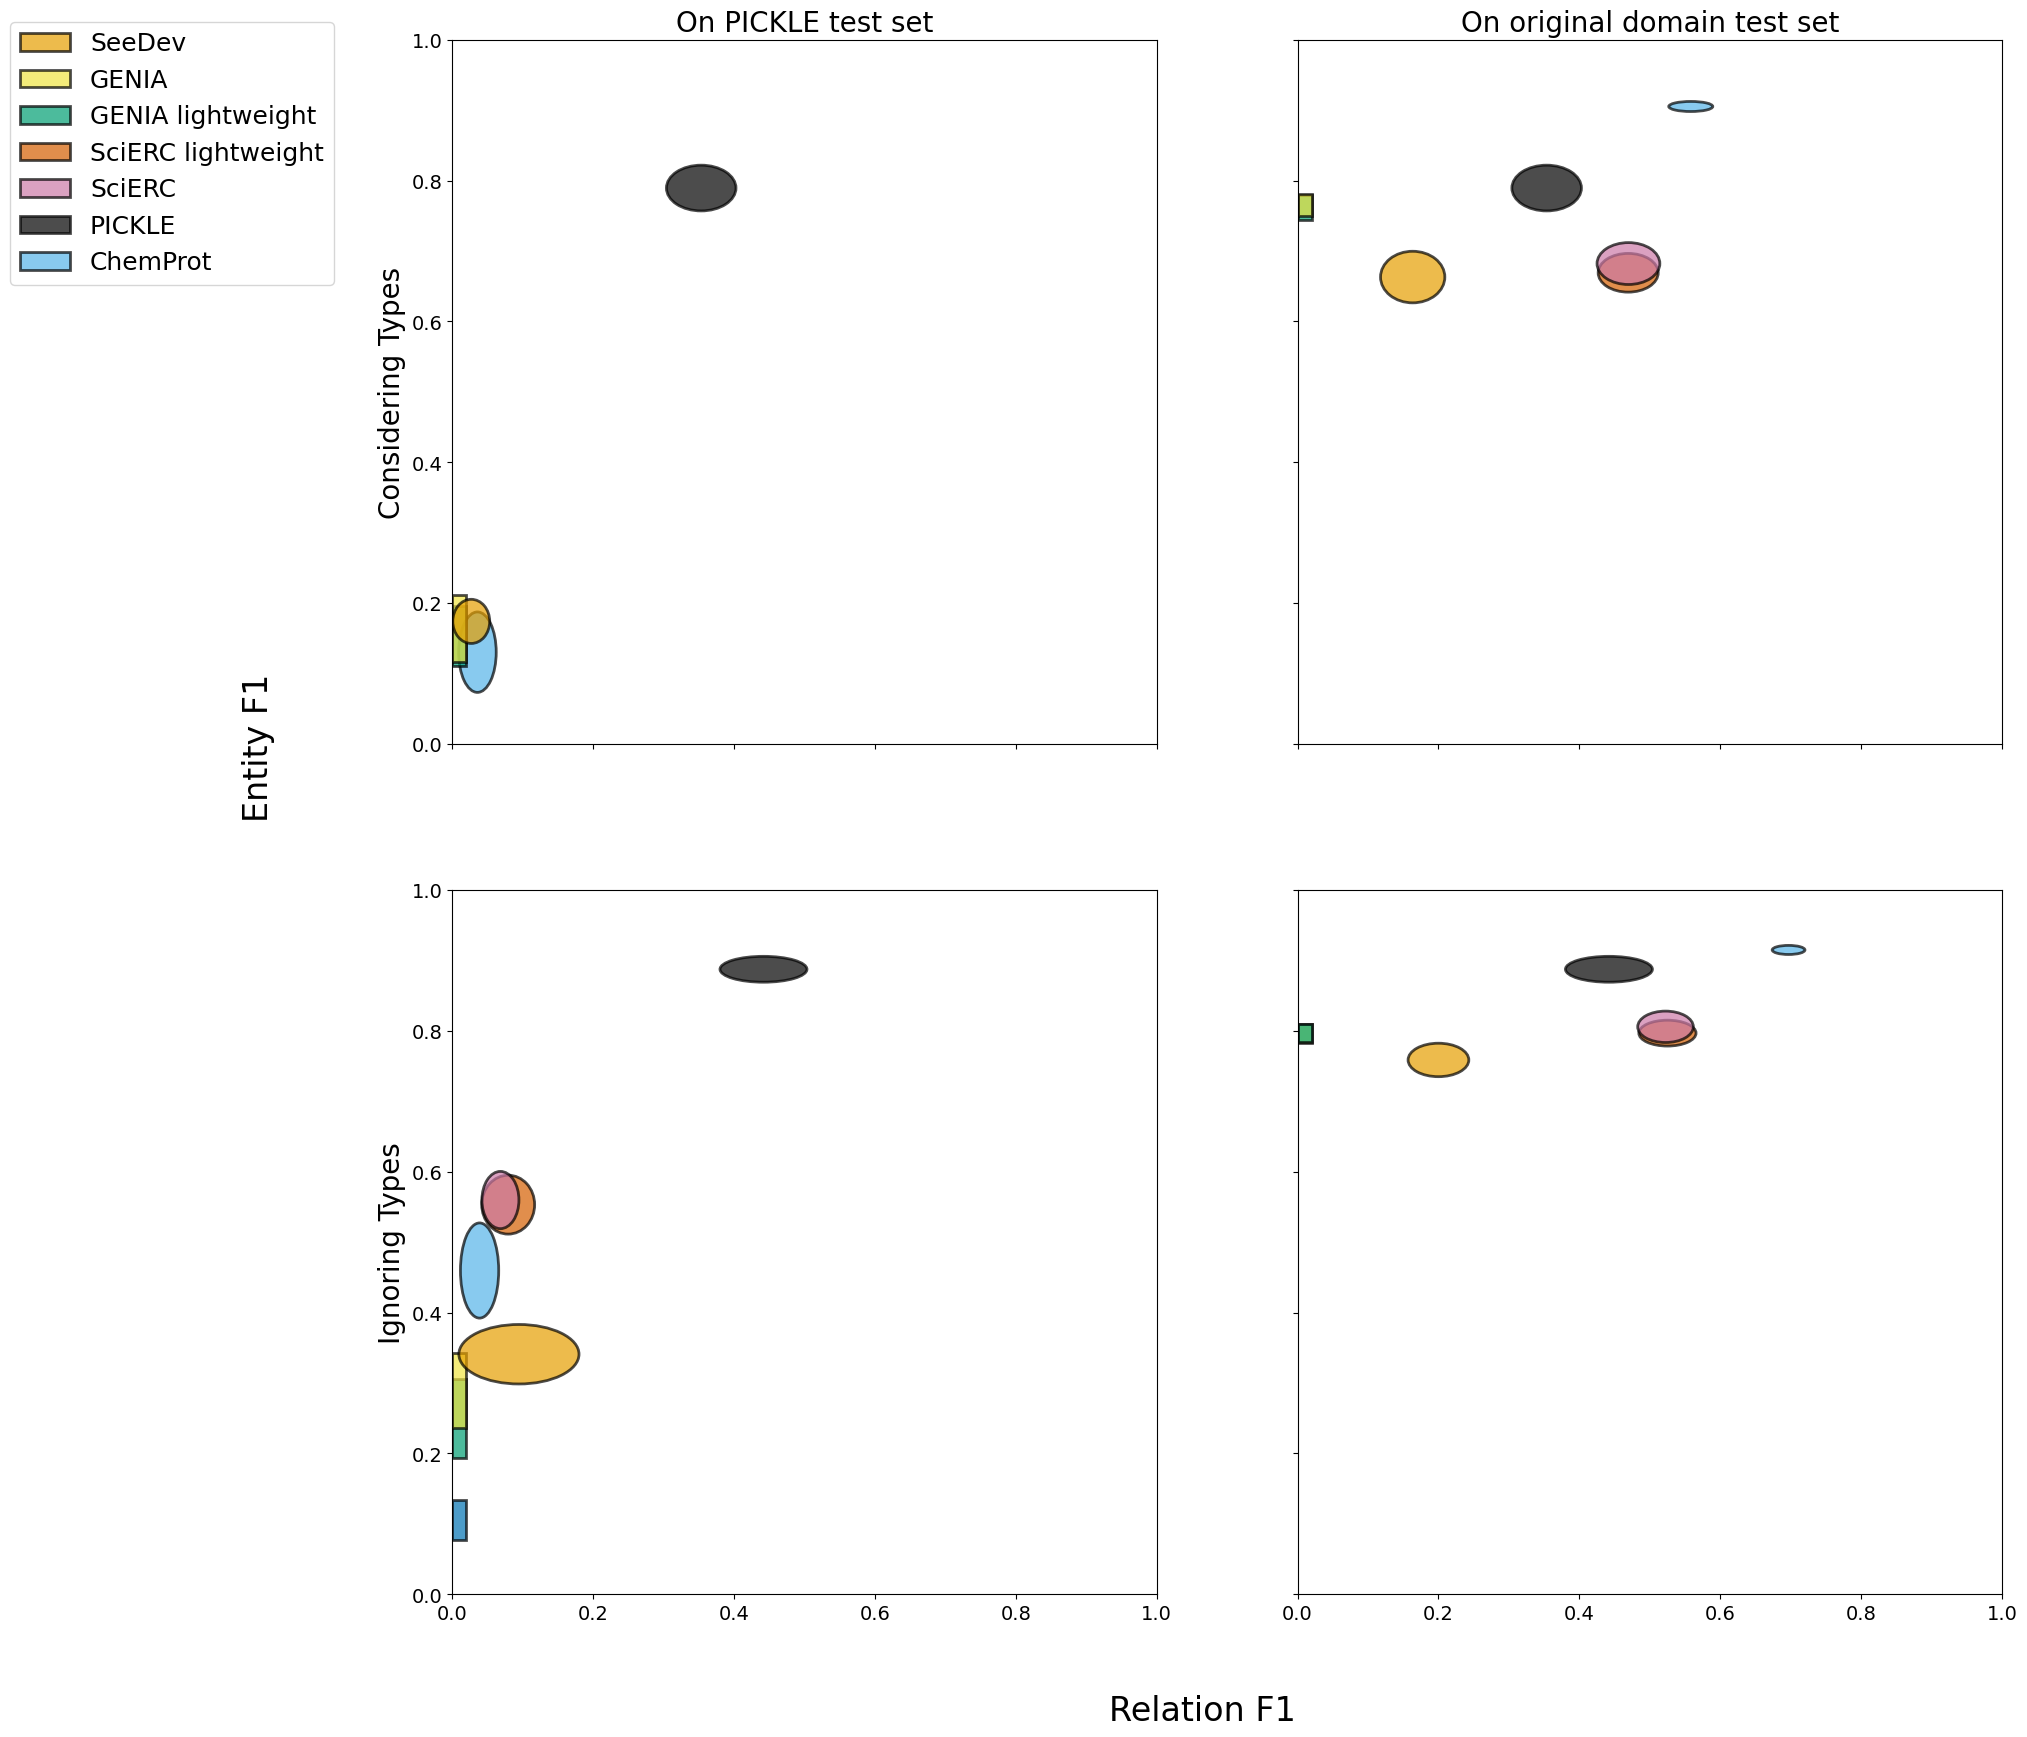

In [29]:
fig, axs = plt.subplots(2, 2, subplot_kw={'aspect': 'equal'}, figsize=(20, 20),sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05)
        
# Plot the data
for model, ell_tup in graph_part['on_pickle_with_types'].items():

    if 0 in ell_tup:
        rect_x = ell_tup[1] - 0.5*ell_tup[3]
        shape = Rectangle((0, rect_x), 0.02, ell_tup[3], edgecolor='black', linewidth=2,
                          linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.7)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=2,
                        linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.7)
    
    # Add shape to axis
    axs[0,0].add_artist(shape)

for model, ell_tup in graph_part['on_pickle_withOUT_types'].items():

    if 0 in ell_tup:
        rect_x = ell_tup[1] - 0.5*ell_tup[3]
        shape = Rectangle((0, rect_x), 0.02, ell_tup[3], edgecolor='black', linewidth=2,
                          linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.7)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=2,
                        linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.7)
    
    # Add shape to axis
    axs[1,0].add_artist(shape)

for model, ell_tup in graph_part['on_original_with_types'].items():

    if 0 in ell_tup:
        rect_x = ell_tup[1] - 0.5*ell_tup[3]
        shape = Rectangle((0, rect_x), 0.02, ell_tup[3], edgecolor='black', linewidth=2,
                          linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.7)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=2,
                        linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.7)
    
    # Add shape to axis
    axs[0,1].add_artist(shape)

for model, ell_tup in graph_part['on_original_withOUT_types'].items():

    if 0 in ell_tup:
        rect_x = ell_tup[1] - 0.5*ell_tup[3]
        shape = Rectangle((0, rect_x), 0.02, ell_tup[3], edgecolor='black', linewidth=2,
                          linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.7)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=2,
                        linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.7)
    
    # Add shape to axis
    axs[1,1].add_artist(shape)


# Overall plot formatting
axs[0,0].set_ylabel('Considering Types', size=20)
axs[1,0].set_ylabel('Ignoring Types', size=20)
axs[0,0].set_title('On PICKLE test set', size=20)
axs[0,1].set_title('On original domain test set', size=20)
fig.supylabel('Entity F1', size=24)
fig.supxlabel('Relation F1', size=24)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.legend(bbox_to_anchor=(-1.35, 2.25), fontsize=18)
plt.subplots_adjust(bottom=0.05)